In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.shape

(891, 12)

In [4]:
data_test.shape

(418, 11)

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Types

In [6]:
data_train.info()
print('_'*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Class Distribution

In [7]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

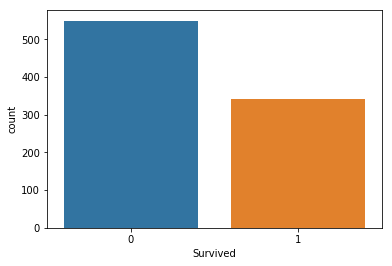

In [8]:
sns.countplot(data_train['Survived'],label="Survived")

# Numerical Features Distribution

In [9]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Categorical Features Distribution

In [10]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

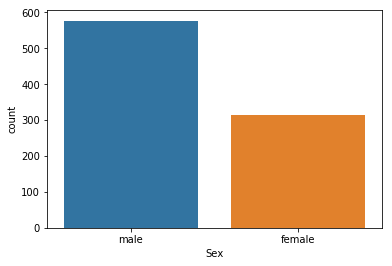

In [11]:
sns.countplot(data_train['Sex'],label="Sex")

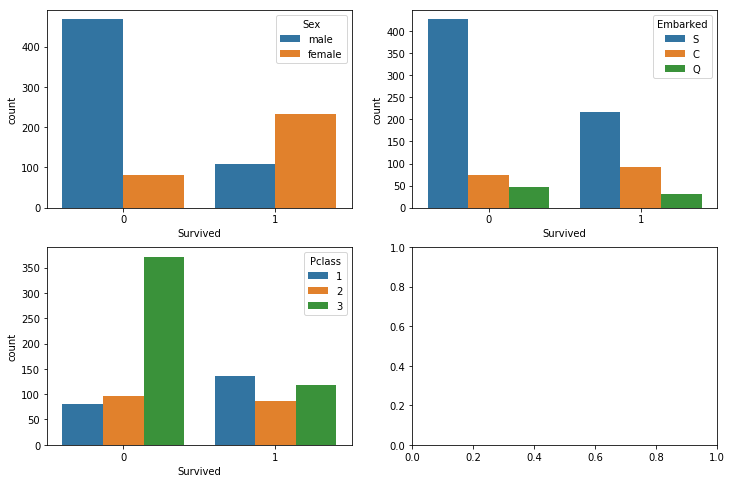

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x="Survived", hue="Sex", data=data_train, ax=axarr[0][0])
sns.countplot(x="Survived", hue="Embarked", data=data_train, ax=axarr[0][1])
sns.countplot(x="Survived", hue="Pclass", data=data_train, ax=axarr[1][0])

# Embarked Analysis

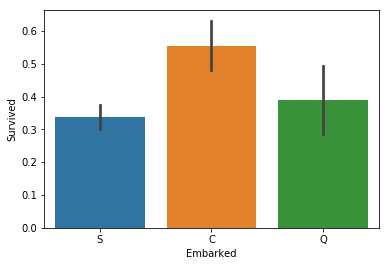

In [13]:
sns.barplot(x = "Embarked", 
            y = "Survived", 
            data=data_train, 
            linewidth=2)

In [14]:
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# Pclass Analysis

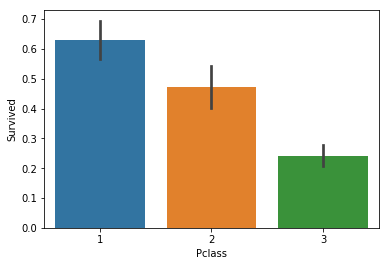

In [15]:
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=data_train, 
            linewidth=2)

In [16]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Sex Analysis

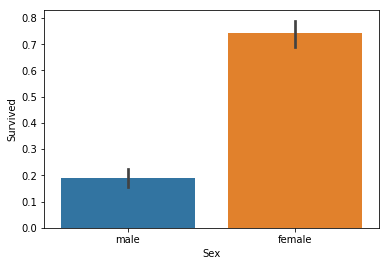

In [17]:
sns.barplot(x = "Sex", 
            y = "Survived", 
            data=data_train, 
            linewidth=2)

In [18]:
data_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Parch Analysis

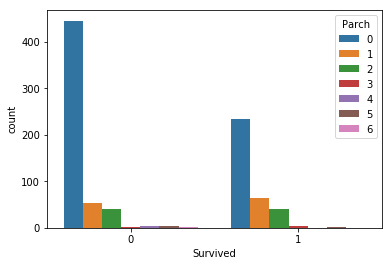

In [19]:
sns.countplot(x="Survived", hue="Parch", data=data_train)

In [20]:
data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# SibSp Analysis

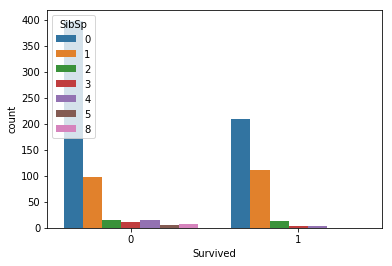

In [21]:
sns.countplot(x="Survived", hue="SibSp", data=data_train)

In [22]:
data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Age Analysis

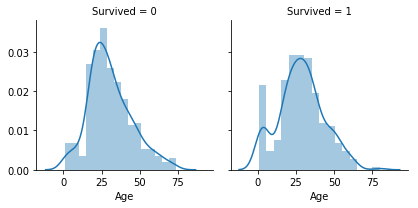

In [23]:
g = sns.FacetGrid(data_train, col='Survived')
g.map(sns.distplot, 'Age')

# Fare Analysis

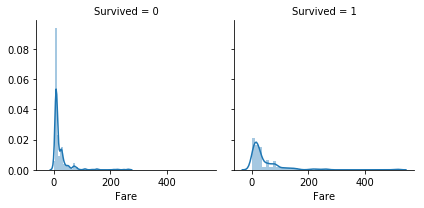

In [24]:
g = sns.FacetGrid(data_train, col='Survived')
g.map(sns.distplot, 'Fare')

# Dropping features 

In [25]:
df_train = data_train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'Fare'], axis=1)
df_test = data_test.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'Fare'], axis=1)

In [26]:
print("Train:", data_train.shape)
print("Test:", data_test.shape)

Train: (891, 12)
Test: (418, 11)


# Binning Continuous Features

In [27]:
df_train['Age'] = pd.cut(df_train['Age'], bins=5, labels=["0", "1", "2", "3", "4"])
df_test['Age'] = pd.cut(df_test['Age'], bins=5, labels=["0", "1", "2", "3", "4"])

In [28]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,1,1,0,S
1,1,1,female,2,1,0,C
2,1,3,female,1,0,0,S
3,1,1,female,2,1,0,S
4,0,3,male,2,0,0,S


# Null Values

In [29]:
print(data_test.isnull().values.any())
print(data_train.isnull().values.any())

True
True


In [30]:
missing_df_train = data_train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['Variable', 'Somme']
missing_df_train['Pourcentage'] = round((missing_df_train['Somme'] / data_train.shape[0])*100)
missing_df_train

,Variable,Somme,Pourcentage
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,20.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


We can observe high percentages of missing values in the train set:
- 20% of the 'Age' instances
- 77% of the 'Cabin' instances

In [31]:
missing_df_test = data_test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['Variable', 'Somme']
missing_df_test['Pourcentage'] = round((missing_df_test['Somme'] / data_test.shape[0])*100)
missing_df_test

,Variable,Somme,Pourcentage
0,PassengerId,0,0.0
1,Pclass,0,0.0
2,Name,0,0.0
3,Sex,0,0.0
4,Age,86,21.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Ticket,0,0.0
8,Fare,1,0.0
9,Cabin,327,78.0


We can observe high percentages of missing values in the test set:
- 21% of the 'Age' instances
- 78% of the 'Cabin' instances

## Filling Missing Values

### Age

In [32]:
df_train['Age'].fillna(method='pad', inplace=True) 
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [33]:
df_test['Age'].fillna(method='pad', inplace=True) 
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### Embarked

In [34]:
df_train['Embarked'].fillna(method='pad', inplace=True) 
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [35]:
df_test['Embarked'].fillna(method='pad', inplace=True) 
df_test.head().isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train["Sex"] = encoder.fit_transform(df_train["Sex"])
df_test["Sex"] = encoder.fit_transform(df_test["Sex"])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,1,1,0,S
1,1,1,0,2,1,0,C
2,1,3,0,1,0,0,S
3,1,1,0,2,1,0,S
4,0,3,1,2,0,0,S


In [37]:
encoder = LabelEncoder()
df_train["Embarked"] = encoder.fit_transform(df_train["Embarked"])
df_test["Embarked"] = encoder.fit_transform(df_test["Sex"])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,1,1,0,2
1,1,1,0,2,1,0,0
2,1,3,0,1,0,0,2
3,1,1,0,2,1,0,2
4,0,3,1,2,0,0,2


# Data Splitting

In [39]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_test  = df_test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

# Models

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
accuracy_knn = knn.score(X_train, Y_train)

In [47]:
accuracy_knn

0.84399551066217737

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predictions = rfc.predict(X_test)
accuracy_rfc = rfc.score(X_train, Y_train)

In [48]:
accuracy_rfc

NameError: name 'accuracy_rfc' is not defined

In [50]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": predictions
    })